In [153]:
from scipy.integrate import solve_bvp
from scipy.integrate import simpson
from scipy.optimize import curve_fit
from math import factorial
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

In [224]:
# Harmonic oscillator potential: p^2/2m + x^2/2
ho = lambda x: 0.5 * x ** 2

# infinite square well potential: 0 inside well, infinity outside
isw = lambda x: x * 0

# Linear potential
lp = lambda x: abs(x)

In [4]:
# set mass and hbar to 1
def k_squared(E, x):
    return -2 * (E-potential(x))

In [163]:
# time independent schrodinger equation
def tise(E_guess, psi, x):
    return (psi[1], -k_squared(E_guess, x) * psi[0])

# numerov integrator
def integrator(lb, rb, energy, pot_func):
    x, dx = np.linspace(lb, rb, 500, retstep=True)
    phi = np.zeros_like(x)
    phi[0] = 0
    phi[1] = 0.0001
    g = 2 * (energy - pot_func(x))
    f = 1 + ((dx**2)/12)*g
    for i in range(len(phi))[1:-1]:
        phi[i+1] = phi[i+1] = ((12 - 10*f[i])*phi[i] - f[i-1]*phi[i-1]) / f[i+1]
    # normalize with Simpsons
    norm_factor = simpson(abs(phi)**2, x)
    if abs(norm_factor) < 1e-8:
        print("Normalization factor is zero, setting to 1")
        norm_factor = 1
    return x, phi / np.sqrt(norm_factor)

Text(0.5, 1.0, 'Infinite square well energy eigenstate (n = 5)')

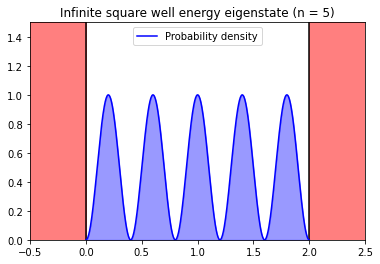

In [220]:
# test the solver on infinite square well
L = 2
n = 5
E = (1 / 2) * (n * np.pi / L)**2
fig, ax = plt.subplots()
#ax.axhline(y=0, xmin=2/7, xmax=6/7, color="black")
ax.axvline(x=0, color="black")
ax.axvline(x=L, color="black")
xgrid, phi_sol = integrator(lb=0, rb=L, energy=E, pot_func=isw)
#ax.plot(xgrid, phi_sol, color="orange", label="Numerical")
#ax.plot(xgrid, np.sqrt(2/L)*np.sin(n*np.pi*xgrid/L), label="Exact", linestyle="--", alpha=0.5, color="blue")
ax.plot(xgrid, abs(phi_sol)**2, color="blue", label="Probability density")
ax.fill_between(xgrid, abs(phi_sol)**2, color="blue", alpha=0.4)
ax.set_xlim([-0.5, L+0.5])
ax.set_ylim([0, 1.5])
ax.axvspan(0-1, 0, alpha=0.5, color='red')
ax.axvspan(L, L+0.5, alpha=0.5, color='red')
ax.legend()
ax.set_title(f"Infinite square well energy eigenstate (n = {n})")

Text(0.5, 1.0, 'Harmonic oscillator energy eigenstates (up to n=5)')

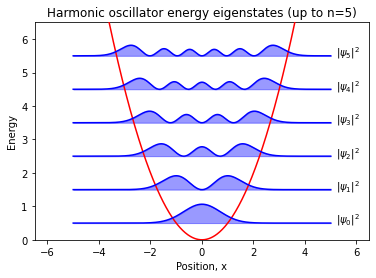

In [228]:
from scipy.special import hermite
# test on the harmonic oscillator
fig, ax = plt.subplots()

n_max = 5
for n in range(0, n_max+1):
    E_n = n + 0.5
    H_n = hermite(n=n)
    xgrid, phi_sol = integrator(lb=-5, rb=5, energy=E_n, pot_func=ho)
    exact_sol = ((np.pi)**(-0.25)) * (1 / np.sqrt(2 ** n * factorial(n)) * H_n(xgrid) * np.exp(-xgrid**2 / 2))
    #ax.plot(xgrid, (-1)**n * phi_sol, color="orange", label="Numerical")
    #ax.plot(xgrid, exact_sol, alpha=0.5, linestyle="--", color="blue", label="Exact")
    ax.plot(xgrid, E_n + abs(phi_sol)**2, color="blue", label=fr"$|\psi_{n}|^2$", zorder=10)
    ax.fill_between(xgrid, E_n, E_n + abs(phi_sol)**2, color="blue", alpha=0.4)
    ax.annotate(fr"$|\psi_{n}|^2$", (5.2, E_n))

ax.plot(xgrid, ho(xgrid), color="red", label="Harmonic potential", zorder=5)    
    
ax.set_xlim([-6.5, 6.5])
ax.set_ylim([0, E_n+1])
ax.set_xlabel("Position, x")
ax.set_ylabel("Energy")
#ax.legend()
ax.set_title(f"Harmonic oscillator energy eigenstates (up to n={n})")

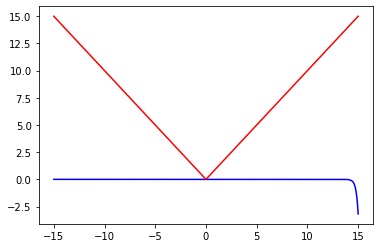

In [244]:
fig, ax = plt.subplots()

E_1 = 2.33810 * (0.5) ** (1 / 3)
E_2 = 4.08794 * (0.5) ** (1 / 3)
E_3 = 5.52055 * (0.5) ** (1 / 3)
xgrid, phi_sol_1 = integrator(lb=-15, rb=15, energy=E_1, pot_func=lp)
_, phi_sol_2 = integrator(lb=-15, rb=15, energy=E_2, pot_func=lp)
_, phi_sol_3 = integrator(lb=-15, rb=15, energy=E_3, pot_func=lp)

ax.plot(xgrid, phi_sol_1, color="blue")
ax.plot(xgrid, lp(xgrid), color="red", label="Linear potential")